# Guided Project: Analyzing Startup Fundraising Deals from Crunchbase

Throughout this guided project, we'll practice working with different memory constraints.

In this step, let's assume we only have 10 megabytes of available memory.While crunchbase-investments.csv consumes 10.3 megabytes of disk space, we know from earlier missions that pandas often requires 4 to 6 times amount of space in memory as the file does on disk (especially when there's many string columns).

The data set of investments we'll be exploring is current as of October 2013. You can download it from GitHub.
https://github.com/datahoarder/crunchbase-october-2013/blob/master/crunchbase-investments.csv

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
crunch_iter = pd.read_csv('crunchbase_investments.csv', encoding='ISO-8859-1', low_memory=False)

# dataframe
col_types = {
    "company_name": "category", "company_category_code": "category", "company_country_code": "category",
    "company_state_code": "category", "company_city": "category", "investor_name": "category",
    "investor_category_code": "category", "investor_country_code": "category", "investor_state_code": "category",
    "investor_city": "category", "funding_round_type": "category", "raised_amount_usd": "float64"
}
use_cols = [
    "company_name", "company_category_code", "company_country_code", "company_state_code","company_city",
    "investor_name", "investor_category_code", "investor_country_code", "investor_state_code", "investor_city",
    "funding_round_type", "funded_at", "raised_amount_usd"
]

crunch_iter_shape = pd.read_csv('crunchbase_investments.csv', usecols=use_cols, dtype=col_types, parse_dates=["funded_at"], encoding='ISO-8859-1', chunksize=1000)

# steps
Steps:
- Determine dtype for each column - DONE
- count number of missing value counts - DONE
- create dictionary of all values - DONE (but don't even think this is necessary)
- count unique values and unique value percentage of total values - DONE
- memory footprint - DONE
- drop certain columns that aren't useful for analysis - DONE
- specify dtypes - DONE
- change types for efficiency - DONE
- clean data, if necesssary - NOT NECESSARY
- create new database - DONE
- inject csv into new database

In [2]:
# determine dtype for each column and memory usage in mb for each column
for crunch in crunch_iter:
    print(crunch)
    print(crunch_iter[crunch].dtype)
    print((crunch_iter[crunch].memory_usage(deep=True)) / (2 ** 20))
    print('------------------------')

company_permalink
object
3.8699302673339844
------------------------
company_name
object
3.425077438354492
------------------------
company_category_code
object
3.2627410888671875
------------------------
company_country_code
object
3.0253448486328125
------------------------
company_state_code
object
2.962283134460449
------------------------
company_region
object
3.25362491607666
------------------------
company_city
object
3.343595504760742
------------------------
investor_permalink
object
4.749942779541016
------------------------
investor_name
object
3.7343921661376953
------------------------
investor_category_code
object
1.6893692016601562
------------------------
investor_country_code
object
2.704906463623047
------------------------
investor_state_code
object
2.542128562927246
------------------------
investor_region
object
3.239068031311035
------------------------
investor_city
object
2.9316816329956055
------------------------
funding_round_type
object
3.2528257369995117
-

In [3]:
# count number of missing value counts
for crunch in crunch_iter_shape:
    print(crunch)
    print(crunch_iter_shape[crunch].isnull().sum())
    print('------------------------')

    company_name company_category_code company_country_code  \
0       AdverCar           advertising                  USA   
1     LaunchGram                  news                  USA   
2           uTaP             messaging                  USA   
3       ZoopShop              software                  USA   
4       eFuneral                   web                  USA   
..           ...                   ...                  ...   
995     SpotHero                   web                  USA   
996       Cureeo             ecommerce                  USA   
997   Fibroblast            enterprise                  USA   
998   Whimseybox             ecommerce                  USA   
999   Moxie Jean             ecommerce                  USA   

    company_state_code       company_city      investor_name  \
0                   CA      San Francisco  1-800-FLOWERS.COM   
1                   CA      Mountain View        10Xelerator   
2                  NaN                NaN        10

TypeError: 'TextFileReader' object is not subscriptable

In [4]:
# count unique values and unique value percentage of total values
overall_vc = []
for crunch in crunch_iter:
    print(crunch)
    num_unique_values = len(crunch_iter[crunch].unique())
    num_total_values = len(crunch_iter[crunch])
    print(num_unique_values / num_total_values)
    print('------------------------')
    overall_vc.append(crunch_iter[crunch].value_counts())
combined_vc = pd.concat(overall_vc)
print(combined_vc)

company_permalink
0.21891431813883108
------------------------
company_name
0.21891431813883108
------------------------
company_category_code
0.0008322299981085682
------------------------
company_country_code
5.6742954416493286e-05
------------------------
company_state_code
0.0009646302250803858
------------------------
company_region
0.010346132021940608
------------------------
company_city
0.023264611310762247
------------------------
investor_permalink
0.19960279931908453
------------------------
investor_name
0.19795725364100625
------------------------
investor_category_code
0.0006430868167202572
------------------------
investor_country_code
0.0013807452241346699
------------------------
investor_state_code
0.0009646302250803858
------------------------
investor_region
0.011083790429355022
------------------------
investor_city
0.018744089275581615
------------------------
funding_round_type
0.00018914318138831096
------------------------
funded_at
0.053130319651976544
------

tables to drop
1. company_permalink
2. company_region
3. investor_permalink
4. investor_region
5. funded_month
6. funded_quarter
7. funded_year

Tables to include and their data type to specify:
1. "company_name": "category"
2. "company_category_code": "category"
3. "company_country_code": "category"
4. "company_state_code": "category"
5. "company_city": "category"
6. "investor_name": "category"
7. "investor_category_code": "category"
8. "investor_country_code": "category"
9. "investor_state_code": "category"
10. "investor_city": "category"
11. "funding_round_type": "category"
12. "funded_at": "datetime64"
13. "raised_amount_usd": "int64" <-- need to convert all float to int

In [5]:
# find max integer/float in column

print(crunch_iter['raised_amount_usd'].max())

3200000000.0


(array([ 6., 20., 13., 11.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([0.12555218, 0.13660088, 0.14764957, 0.15869827, 0.16974697,
        0.18079567, 0.19184437, 0.20289307, 0.21394176, 0.22499046,
        0.23603916]),
 <BarContainer object of 10 artists>)

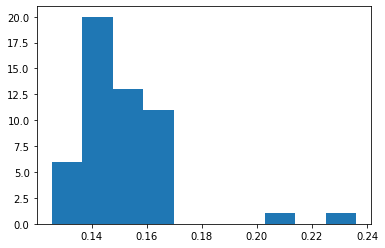

In [6]:
# mapping the memory usage of each chunk

memory_footprints = []
for chunk in crunch_iter_shape:
    memory_footprints.append(chunk.memory_usage(deep=True).sum()/(2 ** 20))
plt.hist(memory_footprints)

In [7]:
# totaling the chunks together to determine total memory used in dataframe
print(sum(memory_footprints))

7.870912551879883


# steps for 3/4 - loading chunks into sqlite
1. create and connect to a new sqlite database file - DONE
2. expand on the existing chunk processing code to export each chunk to a new table in the sqlite db
3. query the table and make sure the data types match up for each column

In [8]:
# create and connecto a new sqlite database file

conn = sqlite3.connect('crunchbase_investments.db')

In [9]:
# export each chunk to a new table in the sqlite db

for chunk in crunch_iter_shape:
    chunk.to_sql('investments', conn, if_exists='append', index=False)

In [10]:
# query the table and make sure the data types match up for each column

pd.read_sql('''SELECT * FROM investments;''', conn)

,company_name,company_category_code,company_country_code,company_state_code,company_city,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_city,funding_round_type,funded_at,raised_amount_usd
0,AdverCar,advertising,USA,CA,San Francisco,1-800-FLOWERS.COM,None,USA,NY,New York,series-a,2012-10-30 00:00:00,2000000.0
1,LaunchGram,news,USA,CA,Mountain View,10Xelerator,finance,USA,OH,Columbus,other,2012-01-23 00:00:00,20000.0
2,uTaP,messaging,USA,None,None,10Xelerator,finance,USA,OH,Columbus,other,2012-01-01 00:00:00,20000.0
3,ZoopShop,software,USA,OH,columbus,10Xelerator,finance,USA,OH,Columbus,angel,2012-02-15 00:00:00,20000.0
4,eFuneral,web,USA,OH,Cleveland,10Xelerator,finance,USA,OH,Columbus,other,2011-09-08 00:00:00,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52865,Garantia Data,enterprise,USA,CA,Santa Clara,Zohar Gilon,None,None,None,None,series-a,2012-08-08 00:00:00,3800000.0
52866,DudaMobile,mobile,USA,CA,Palo Alto,Zohar Gilon,None,None,None,None,series-c+,2013-04-08 00:00:00,10300000.0
52867,SiteBrains,software,USA,CA,San Francisco,zohar israel,None,None,None,None,angel,2010-08-01 00:00:00,350000.0
52868,Comprehend Systems,enterprise,USA,CA,Palo Alto,Zorba Lieberman,None,None,None,None,series-a,2013-07-11 00:00:00,8400000.0


In [11]:
results_df = pd.read_sql('''PRAGMA table_info(investments);''', conn)
print(results_df)

    cid                    name       type  notnull dflt_value  pk
0     0            company_name       TEXT        0       None   0
1     1   company_category_code       TEXT        0       None   0
2     2    company_country_code       TEXT        0       None   0
3     3      company_state_code       TEXT        0       None   0
4     4            company_city       TEXT        0       None   0
5     5           investor_name       TEXT        0       None   0
6     6  investor_category_code       TEXT        0       None   0
7     7   investor_country_code       TEXT        0       None   0
8     8     investor_state_code       TEXT        0       None   0
9     9           investor_city       TEXT        0       None   0
10   10      funding_round_type       TEXT        0       None   0
11   11               funded_at  TIMESTAMP        0       None   0
12   12       raised_amount_usd       REAL        0       None   0


# Questions to Answer
1. What proportion of the total amount of funds did the top 10% raise? What about the top 1%? 
2. Compare these values to the proportions the bottom 10% and bottom 1% raised.
3. Which category of company attracted the most investments?
4. Which investor contributed the most money (across all startups)?
5. Which investors contributed the most money per startup?
6. Which funding round was the most popular?
7. Which funding round was the least popular?

In [12]:
# What proportion of the total amount of funds did the top 10% raise?
pd.read_sql('''
            SELECT investor_name,
                   SUM(raised_amount_usd) AS total_investment,
                   (SUM(raised_amount_usd) / 681732200000) AS '%_of_total'
              FROM investments
             GROUP BY 1
             ORDER BY 2 DESC
             LIMIT 10;
            ''', conn)

,investor_name,total_investment,%_of_total
0,Kleiner Perkins Caufield & Byers,1.121783e+10,0.016455
1,New Enterprise Associates,9.692542e+09,0.014218
2,Accel Partners,6.472126e+09,0.009494
3,Goldman Sachs,6.375459e+09,0.009352
4,Sequoia Capital,6.039402e+09,0.008859
5,Intel,5.969200e+09,0.008756
6,Google,5.808800e+09,0.008521
7,Time Warner,5.730000e+09,0.008405
8,Comcast,5.669000e+09,0.008316
9,Greylock Partners,4.960983e+09,0.007277


In [13]:
# top ten percent of investors
pd.read_sql('''
WITH top_ten_investors AS
        (   
        SELECT investor_name,
               SUM(raised_amount_usd) AS total_investment
          FROM investments
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 1046
         )

SELECT SUM(tti.total_investment)
  FROM top_ten_investors AS tti;
''', conn)

# total amount of top ten percent of investors = $565,443,000,000

,SUM(tti.total_investment)
0,5.654430e+11


In [14]:
pd.read_sql('''
SELECT SUM(raised_amount_usd)
  FROM investments

''', conn)

# total amount raised from all investors = $681,732,200,000

,SUM(raised_amount_usd)
0,6.817322e+11


In [15]:
# top one percent of investors
pd.read_sql('''
WITH top_one_investors AS
        (   
        SELECT investor_name,
               SUM(raised_amount_usd) AS total_investment
          FROM investments
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT 105
         )

SELECT SUM(tti.total_investment)
  FROM top_one_investors AS tti;
''', conn)

# total amount of top one percent of investors = $276,969,900,000

,SUM(tti.total_investment)
0,2.769699e+11


In [16]:
# bottom ten percent of investors
pd.read_sql('''
WITH bottom_ten_investors AS
        (   
        SELECT investor_name,
               SUM(raised_amount_usd) AS total_investment
          FROM investments
         GROUP BY 1
         ORDER BY 2 ASC
         LIMIT 1046
         )

SELECT SUM(tti.total_investment)
  FROM bottom_ten_investors AS tti;
''', conn)

# total amount of bottom ten percent of investors = $21,409,138

,SUM(tti.total_investment)
0,21409138.0


In [17]:
# bottom one percent of investors
pd.read_sql('''
WITH bottom_one_investors AS
        (   
        SELECT investor_name,
               SUM(raised_amount_usd) AS total_investment
          FROM investments
         GROUP BY 1
         ORDER BY 2 ASC
         LIMIT 105
         )

SELECT SUM(tti.total_investment)
  FROM bottom_one_investors AS tti;
''', conn)

# total amount of bottom one percent of investors = $0.00

,SUM(tti.total_investment)
0,None


In [18]:
# Which category of company attracted the most investments?
pd.read_sql('''
SELECT company_category_code,
       COUNT(investor_name) AS number_of_investors,
       SUM(raised_amount_usd) AS total_investment
  FROM investments
 GROUP BY 1
 ORDER BY 3 DESC
 LIMIT 1
''', conn)

,company_category_code,number_of_investors,total_investment
0,biotech,4951,1.103964e+11


In [19]:
# Which investor contributed the most money (across all startups)?
pd.read_sql('''
SELECT investor_name,
       SUM(raised_amount_usd) As total_investment
  FROM investments
 GROUP BY 1
 ORDER BY 2 DESC
 LIMIT 1;
''', conn)

,investor_name,total_investment
0,Kleiner Perkins Caufield & Byers,1.121783e+10


In [20]:
# Which investors contributed the most money per startup?
pd.read_sql('''
SELECT investor_name,
       (raised_amount_usd / company_name) AS money_per_startup
  FROM investments
  GROUP BY 1
  ORDER BY 2 DESC
  LIMIT 5;
''', conn)

,investor_name,money_per_startup
0,Hillman Ventures,1.300000e+07
1,City Light Capital,5.000000e+06
2,KLP Enterprises,5.000000e+06
3,Nestors Financial,3.333333e+06
4,Dan Ehrman,2.500000e+06


In [21]:
# Which funding round was the most popular?
pd.read_sql('''
SELECT funding_round_type,
       COUNT(investor_name)
  FROM investments
 GROUP BY 1
 ORDER BY 2 DESC
 LIMIT 1;
''', conn)

,funding_round_type,COUNT(investor_name)
0,series-a,13938


In [27]:
# Which funding round was the most popular?
pd.read_sql('''
SELECT company_name,
       funded_at,
       COUNT(investor_name),
       raised_amount_usd
  FROM investments
 WHERE raised_amount_usd > 0
 GROUP BY 2, 1, 4
 ORDER BY 3 DESC
 LIMIT 1;
''', conn)

,company_name,funded_at,COUNT(investor_name),raised_amount_usd
0,Priceonomics,2012-05-04 00:00:00,29,1500000.0


In [23]:
# Which funding round was the least popular?
pd.read_sql('''
SELECT funding_round_type,
       COUNT(investor_name)
  FROM investments
 WHERE funding_round_type != 'None'
 GROUP BY 1
 ORDER BY 2 ASC
 LIMIT 1;
''', conn)

,funding_round_type,COUNT(investor_name)
0,crowdfunding,5


In [24]:
# Which funding round was the most popular?
pd.read_sql('''
SELECT company_name,
       funded_at,
       COUNT(investor_name),
       raised_amount_usd
  FROM investments
 WHERE funded_at != 'None'
 GROUP BY 2, 1, 4
 ORDER BY 3 ASC
 LIMIT 1;
''', conn)

,company_name,funded_at,COUNT(investor_name),raised_amount_usd
0,Cisco,1987-01-01 00:00:00,1,2500000.0


In [26]:
# query the table and make sure the data types match up for each column

pd.read_sql('''
SELECT *
  FROM investments
 WHERE company_name = 'Socialcam';

''', conn)

,company_name,company_category_code,company_country_code,company_state_code,company_city,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_city,funding_round_type,funded_at,raised_amount_usd
0,Socialcam,mobile,USA,CA,Santa Clara County,Atom Factory,None,None,None,None,angel,2012-04-30 00:00:00,None
1,Socialcam,mobile,USA,CA,Santa Clara County,A-Grade Investments,None,USA,CA,Los Angeles,angel,2012-04-30 00:00:00,None
2,Socialcam,mobile,USA,CA,Santa Clara County,CrunchFund,None,USA,CA,San Francisco,angel,2012-04-30 00:00:00,None
3,Socialcam,mobile,USA,CA,Santa Clara County,Start Fund,None,None,None,None,angel,2012-04-30 00:00:00,None
4,Socialcam,mobile,USA,CA,Santa Clara County,SV Angel,None,USA,CA,San Francisco,angel,2012-04-30 00:00:00,None
5,Socialcam,mobile,USA,CA,Santa Clara County,Alexis Ohanian,None,None,None,None,angel,2012-04-30 00:00:00,None
6,Socialcam,mobile,USA,CA,Santa Clara County,Ari Emmanuel,None,None,None,None,angel,2012-04-30 00:00:00,None
7,Socialcam,mobile,USA,CA,Santa Clara County,Ashton Kutcher,None,None,None,None,angel,2012-04-30 00:00:00,None
8,Socialcam,mobile,USA,CA,Santa Clara County,Brian Chesky,None,None,None,None,angel,2012-04-30 00:00:00,None
9,Socialcam,mobile,USA,CA,Santa Clara County,Emmett Shear,None,None,None,None,angel,2012-04-30 00:00:00,None
